In [1]:
import altair as alt
import duckdb

alt.renderers.enable("png")

RendererRegistry.enable('png')

In [2]:
c = duckdb.connect("dbt.duckdb", read_only=True)

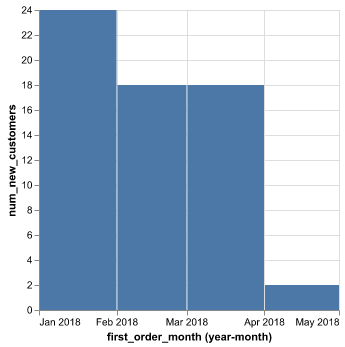

In [3]:
t = c.sql(
    """
    SELECT *
    FROM fnl_sales_newcustomers
    ORDER BY first_order_month
    """
)

(
    alt.Chart(t)
    .mark_bar()
    .encode(
        x=alt.X("yearmonth(first_order_month):T"),
        y=alt.Y("num_new_customers:Q"),
    )
)

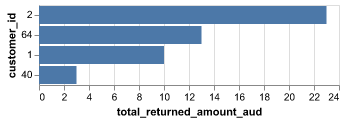

In [4]:
t = c.sql(
    """
    SELECT *
    FROM fnl_finance_returnsamout
    WHERE total_returned_amount_aud > 0
    """
)

(
    alt.Chart(t)
    .mark_bar()
    .encode(
        x=alt.X("total_returned_amount_aud:Q"),
        y=alt.Y("customer_id:O", sort=alt.Sort("-x")),
    )
)